## supervised learning -- classification
To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

we will look at a two class classification problem in two dimensions.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [38]:
from sklearn.datasets import make_blobs

x , y = make_blobs(centers=2 , random_state=0 ,   cluster_std=1)
print('x -->  n_sample , n_feature : ' , x.shape)
print('y -->  n_sample : ' , y.shape)
print('\nfirst 5 sample: \n' , x[:5 , :])
print('first 5 label: ' , y[:5])

x -->  n_sample , n_feature :  (100, 2)
y -->  n_sample :  (100,)

first 5 sample: 
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
first 5 label:  [1 1 0 0 1]


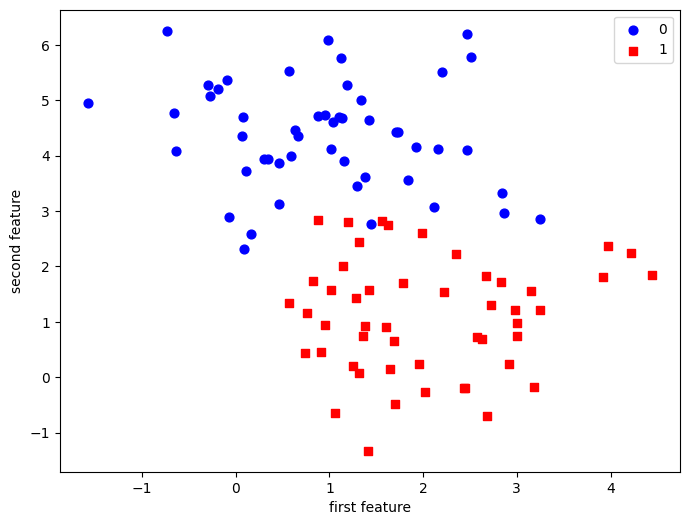

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x[y== 0,0] , x[y== 0,1] , c='blue' , s=40 , label='0' )
plt.scatter(x[y== 1,0] , x[y== 1,1] , c='red' , s=40 , label='1' , marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc= 'upper right')

In [40]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=.25 ,random_state=2 , stratify= y)
#stratify y means, the data is divided into the same classification as y.

- every algorithm is exposed in scikit learn via on 'estimator' object.
- all model in scikit learn have a very consistent interface.
- for instance, we first import logistic regression class. 

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [43]:
print(x_train.shape , y_train.shape)
print(x_train[:10])
print(y_train[:10])

(75, 2) (75,)
[[1.28933778 3.44969159]
 [0.62835793 4.4601363 ]
 [1.02102468 1.57925818]
 [0.08848433 2.32299086]
 [2.97612635 1.21639131]
 [2.20656076 5.50616718]
 [3.2460247  2.84942165]
 [0.88214412 2.84128485]
 [1.25185786 0.20811388]
 [1.19404184 2.80772861]]
[0 0 1 0 1 0 0 1 1 1]


In [44]:
clf.fit(x_train , y_train)

LogisticRegression()

In [45]:
y_pred = clf.predict(x_test)

we can compare these against the true label.

In [46]:
print(y_pred)
print(y_test)

[1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1]
[1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1]


accuracy

In [47]:
print(y_pred == y_test)
print(np.mean(y_pred == y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
1.0


In [48]:
print(clf.score(x_test , y_test))
print(clf.score(x_train , y_train))
#it is often helpful to compare the generalization performance on the test set to the performance on the train set.

1.0
0.92


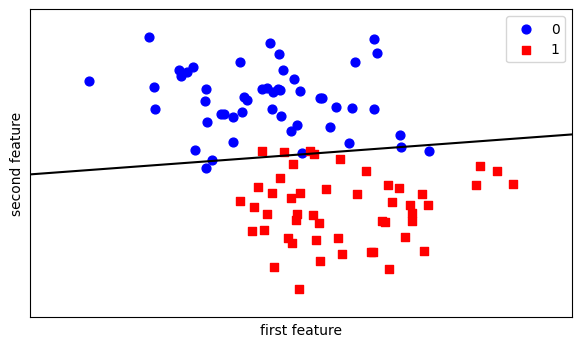

In [49]:
from fig_code_folder.plot_2D_separator_file import plot_2D_separator

plt.figure(figsize=(7,4))
plt.scatter(x[y==0,0] , x[y==0,1] , c='blue' , s=40 , label=0)
plt.scatter(x[y==1,0] , x[y==1,1] ,c='red' , s=40 , label=1 , marker='s')

plot_2D_separator(clf , x)

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right')

`estimated parameters:` all estiamted model parameters are attributes of the estimator object ending by an underscore. here, these are the coefficients and the offset of the line:

In [50]:
print(clf.coef_)  #feature x1  (w1) , feature x2  (w2)
print(clf.intercept_)  #bayas  (w3)

[[ 0.36348692 -2.32556378]]
[5.84194639]


### another classifier:   k nearest neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)

In [52]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

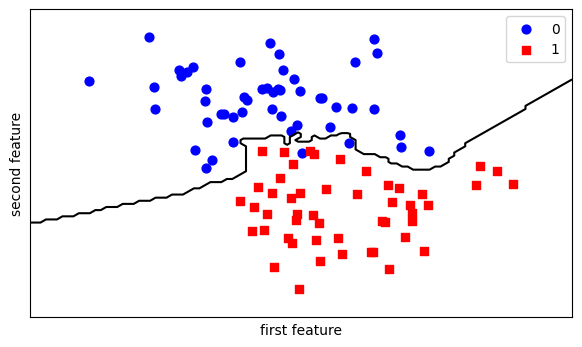

In [53]:
plt.figure(figsize=(7,4))
plt.scatter(x[y==0,0] , x[y==0,1] , c='blue' , s=40 , label=0)
plt.scatter(x[y==1,0] , x[y==1,1] ,c='red' , s=40 , label=1 , marker='s')

plot_2D_separator(knn , x)

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right')

In [54]:
print(knn.score(x_test , y_test))

1.0


## supervised learning _ Regression

Let's start with a simple toy example with one feature dimension (explanatory variable) and one target variable. We will create a dataset out of a sine curve with some noise:

In [55]:
x = np.linspace(-3,3,100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

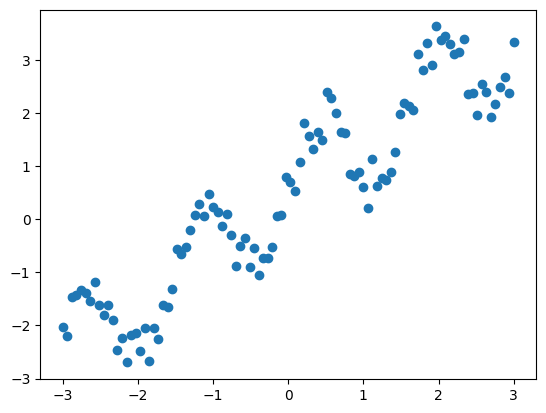

In [56]:
rng = np.random.RandomState(2)
y = np.sin(x * 4) + x + rng.uniform(size= len(x))
plt.plot(x , y , 'o')

### linear Regression

The first model that we will introduce is the so-called simple linear regression. Here, we want to fit a line to the data.

- As we remember, the scikit-learn API requires us to provide the target variable (y) as a 1-dimensional array; scikit-learn's API expects the samples (X) in form a 2-dimensional array, even though it may only consist of 1 feature.
  Thus, let us convert the 1-dimensional x NumPy array into an X array with 2 axes:

In [57]:
print('before shape:' , x.shape)
X = x[: , np.newaxis]
print('after shape:' , X.shape)

before shape: (100,)
after shape: (100, 1)


In [58]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= .25 , random_state=2)

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [60]:
#After fitting to the training data, we paramerterized a linear regression model with the following values.
print('weight coeffisients: ' , regressor.coef_)
print('y-axis intercept: ' , regressor.intercept_)

weight coeffisients:  [0.91477417]
y-axis intercept:  0.42958034512239485


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight \times x + \text{intercept}$$


- Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

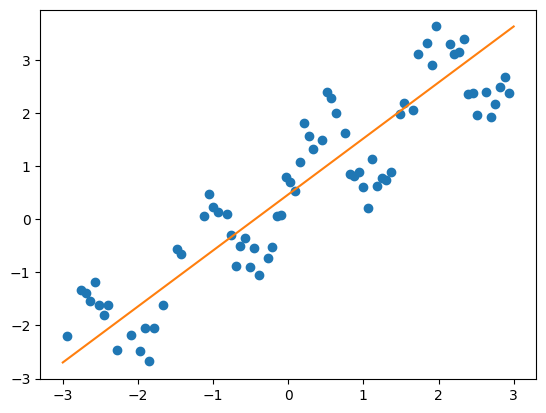

In [61]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot(X_train , y_train , 'o')
plt.plot([X.min() , X.max()] , [y.min() , y.max()])

we use the `predict` method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:

In [62]:
y_pred_test = regressor.predict(X_test)

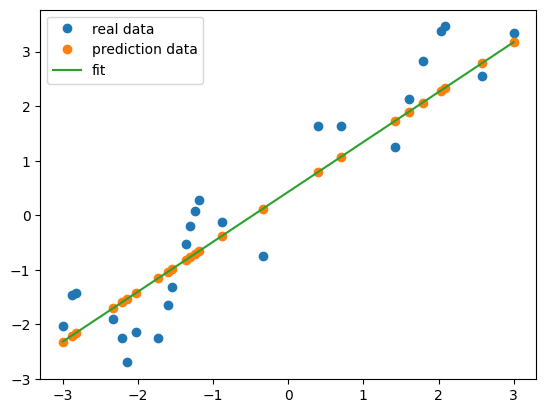

In [63]:
plt.plot(X_test , y_test , 'o' , label='real data')
plt.plot(X_test , y_pred_test , 'o' ,label='prediction data')
plt.plot([X.min() , X.max()] , [min_pt , max_pt] , label='fit')
plt.legend(loc='best')

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the `score` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [64]:
regressor.score(X_test , y_test)

0.8765268639975897

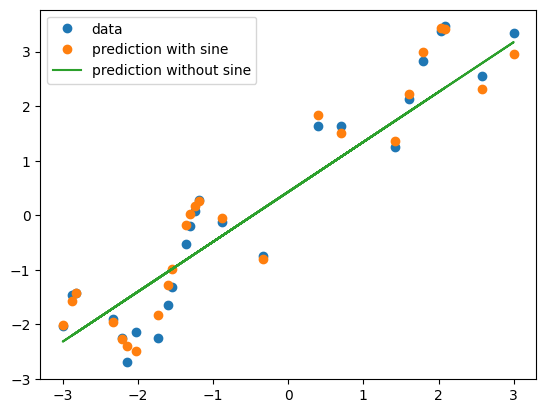

In [65]:
XX_trian = np.concatenate((X_train , np.sin(4 * X_train)) , axis=1)
XX_test = np.concatenate((X_test , np.sin(4 * X_test)) , axis=1)

regressor.fit(XX_trian , y_train)

y_pred_test_sin = regressor.predict(XX_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test_sin, 'o', label="prediction with sine")
plt.plot(X_test, y_pred_test, label='prediction without sine')
plt.legend(loc='best')


KNeighborsRegression
=======================

In [66]:
from sklearn.neighbors import KNeighborsRegressor
kneighbors_regressor = KNeighborsRegressor(n_neighbors= 3)
kneighbors_regressor.fit(X_train , y_train)

KNeighborsRegressor(n_neighbors=3)

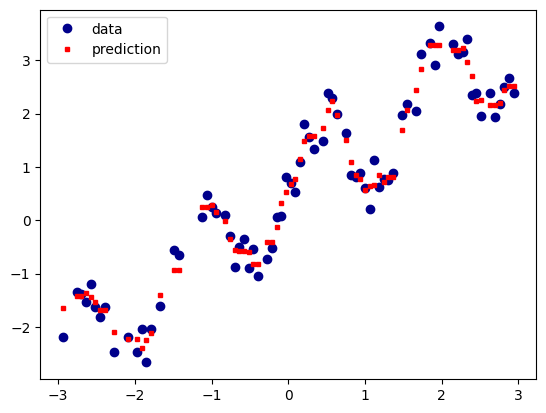

In [67]:
y_pred_train = kneighbors_regressor.predict(X_train)

plt.plot(X_train , y_train , 'o' , label='data' , markersize=6 , color='darkblue')
plt.plot(X_train , y_pred_train , 's' , label='prediction' , markersize=3 , color='red')
plt.legend(loc='best')

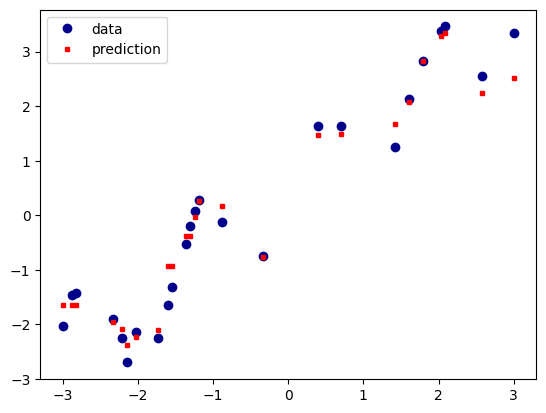

In [68]:
y_pred_test = kneighbors_regressor.predict(X_test)

plt.plot(X_test , y_test , 'o' , label='data' , markersize=6 , color='darkblue')
plt.plot(X_test , y_pred_test , 's' , label='prediction' , markersize=3 , color='red')
plt.legend(loc='best')

In [69]:
print(kneighbors_regressor.score(X_test , y_test))

0.9776512910866899
